In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

# Ensure figures directory exists for saving charts
os.makedirs("figures", exist_ok=True)


In [17]:
df = pd.read_csv("CreditCardData.csv")
df

df0 = df.copy()

# Problem Statement
Every year billions of dollars are lost in fraudulent transaction by credit card. Today we are going to explore those into  depth. 


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

# Lets look at each of the attributes.
Basically these are transactions. We these transactions are flagged as 0 or 1.

Transaction ID: The ids of each transation, primary key.  
Date: The day the transaction occured.  
Day of the Week: Which day the transaction happened  
Type of Card: VI

# Data Preprocessing
### Data Cleaning
  - time to pd date time 
  - Money to same currency, remove currency sign 
  - Capped values, Days in a year(365), Marks (100), Percentage (100)
  


In [19]:


# we can see there are missing values, it is not that much, so we are going to drop it.
# renamin the column
df.rename(columns= {'Time':'Time_(h)'}, inplace = True)
# Lets get how many missing in each column
df.isnull().sum()

# Lets drop all column with the missing values
df.dropna(inplace=True)
df.info()

# Lets see if there is any hidden missing values
df['Amount'] = df['Amount'].str.replace('£','')

<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          99977 non-null  object 
 1   Date                    99977 non-null  object 
 2   Day of Week             99977 non-null  object 
 3   Time_(h)                99977 non-null  int64  
 4   Type of Card            99977 non-null  object 
 5   Entry Mode              99977 non-null  object 
 6   Amount                  99977 non-null  object 
 7   Type of Transaction     99977 non-null  object 
 8   Merchant Group          99977 non-null  object 
 9   Country of Transaction  99977 non-null  object 
 10  Shipping Address        99977 non-null  object 
 11  Country of Residence    99977 non-null  object 
 12  Gender                  99977 non-null  object 
 13  Age                     99977 non-null  float64
 14  Bank                    99977 non-null  obj

In [20]:
# Lets fix the data type.
df['Date'] = pd.to_datetime(df['Date'])
## Also look if the date is consistent

df['Amount'] = df['Amount'].astype('int64')
# lets remove all the strings in the amount column 



df['Fraud'] = df['Fraud'].astype('bool')

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          99977 non-null  object        
 1   Date                    99977 non-null  datetime64[ns]
 2   Day of Week             99977 non-null  object        
 3   Time_(h)                99977 non-null  int64         
 4   Type of Card            99977 non-null  object        
 5   Entry Mode              99977 non-null  object        
 6   Amount                  99977 non-null  int64         
 7   Type of Transaction     99977 non-null  object        
 8   Merchant Group          99977 non-null  object        
 9   Country of Transaction  99977 non-null  object        
 10  Shipping Address        99977 non-null  object        
 11  Country of Residence    99977 non-null  object        
 12  Gender                  99977 non-null  object     

C:\Users\nafee\AppData\Local\Temp\ipykernel_10056\2927696456.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


EDA

In [21]:
# One thing we can do is drop the real (0) transaction, and lets see what the dataset with fradulent transaction tell us about.
df1 = df[df['Fraud'] == 1]
df1 

df1 = df1.drop(columns='Transaction ID')


# Lets divide the categorical and numerical features. For easier access to the numerical calculations and data exploration.

cat_feat = df.select_dtypes(include=(['object','category','bool'])).columns.to_list()
num_feat = df.select_dtypes(include=(['float64','int64'])).columns.tolist()

cat_feat1 = df1.select_dtypes(include=(['object','category','bool'])).columns.to_list()
num_feat1 = df1.select_dtypes(include=(['float64','int64'])).columns.tolist()





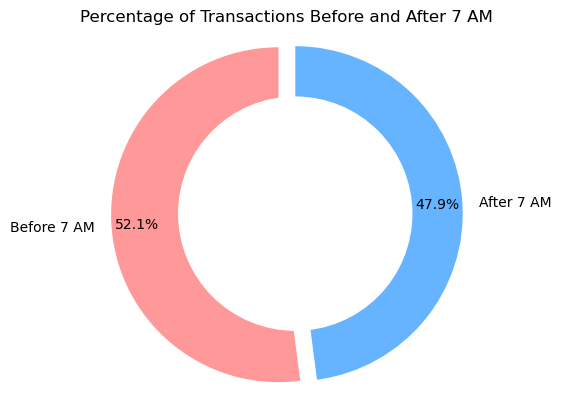

In [ ]:
# Calculate the number of transactions before and after 7 am
transactions_before_7am = len(df1[df1['Time_(h)'] <= 7])
transactions_after_7am = len(df1[df1['Time_(h)'] > 7])

# Calculate percentages
total_transactions = len(df1)
percentage_before_7am = (transactions_before_7am / total_transactions) * 100
percentage_after_7am = (transactions_after_7am / total_transactions) * 100

# Create a donut chart
labels = ['Before 7 AM', 'After 7 AM']
sizes = [percentage_before_7am, percentage_after_7am]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice (Before 7 AM)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Save and show figure
plt.savefig('figures/fraud_rate_by_hour.png', bbox_inches='tight')
plt.show()

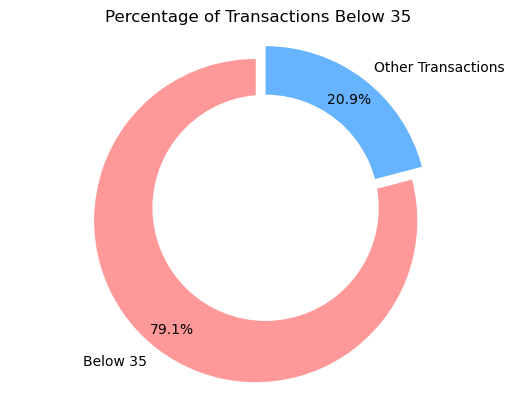

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of transactions below 35
transactions_below_35 = len(df1[df1['Amount'] < 35])

# Calculate the percentage of transactions below 35
total_transactions = len(df1)
percentage_below_35 = (transactions_below_35 / total_transactions) * 100

# Create a donut chart
labels = ['Below 35', 'Other Transactions']
sizes = [percentage_below_35, 100 - percentage_below_35]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice (Below 35)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Save and show figure
plt.savefig('figures/fraud_amount_distribution.png', bbox_inches='tight')
plt.show()


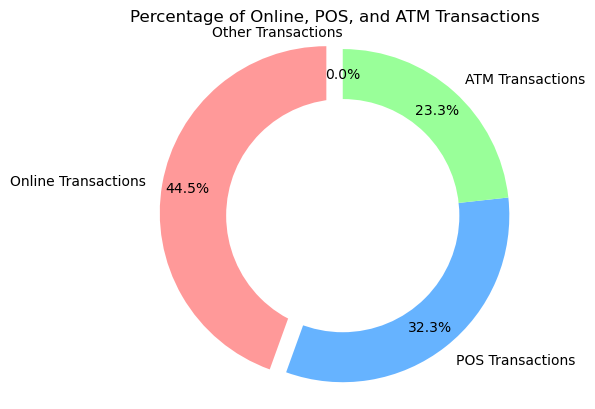

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the number of Online, POS, and ATM transactions
online_transactions = len(df1[df1['Type of Transaction'] == 'Online'])
pos_transactions = len(df1[df1['Type of Transaction'] == 'POS'])
atm_transactions = len(df1[df1['Type of Transaction'] == 'ATM'])

# Calculate the total number of transactions
total_transactions = len(df1)

# Calculate percentages
percentage_online_transactions = (online_transactions / total_transactions) * 100
percentage_pos_transactions = (pos_transactions / total_transactions) * 100
percentage_atm_transactions = (atm_transactions / total_transactions) * 100
percentage_other_transactions = 100 - (percentage_online_transactions + percentage_pos_transactions + percentage_atm_transactions)

# Create a donut chart
labels = ['Online Transactions', 'POS Transactions', 'ATM Transactions', 'Other Transactions']
sizes = [percentage_online_transactions, percentage_pos_transactions, percentage_atm_transactions, percentage_other_transactions]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0)  # explode the first slice (Online Transactions)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Save and show figure
plt.savefig('figures/fraud_by_channel.png', bbox_inches='tight')
plt.show()


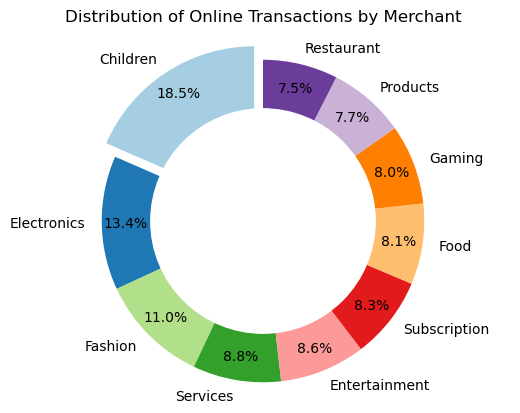

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter online transactions
online_transactions_df = df1[df1['Type of Transaction'] == 'Online']

# Calculate the number of transactions for each merchant within online transactions
merchant_counts = online_transactions_df['Merchant Group'].value_counts()

# Calculate percentages
total_online_transactions = len(online_transactions_df)
merchant_percentages = (merchant_counts / total_online_transactions) * 100

# Create a donut chart
labels = merchant_percentages.index
sizes = merchant_percentages.values
colors = plt.cm.Paired(range(len(labels)))
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]  # explode the first slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85)

# Draw a circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Save and show figure
plt.savefig('figures/fraud_by_merchant_group.png', bbox_inches='tight')
plt.show()


Now that we have a dataset, with fully fradulent transaction, lets analyze the trends. 

In [ ]:
# Lets analyze the numerical trends. 

# use a loop to get the summary statists.
# for x in num_feat:
#     # if x == 'Amount':
#         print(df[x].describe())
        
# WE actually dont need the summary statistic, because we have the data wrangler.

num_feat

# Filter rows based on column: 'Entry Mode'
dfx = df1.copy()
dfx = df1[(df1['Entry Mode'] == "CVC") != (df1['Type of Transaction'] == "Online") ]

# df1.to_csv("credit_clean.csv", index = False)


dfx # that means CVC is Online transaction.

count    7192.000000
mean        9.104839
std         7.077014
min         0.000000
25%         3.000000
50%         7.000000
75%        15.000000
max        24.000000
Name: Time_(h), dtype: float64

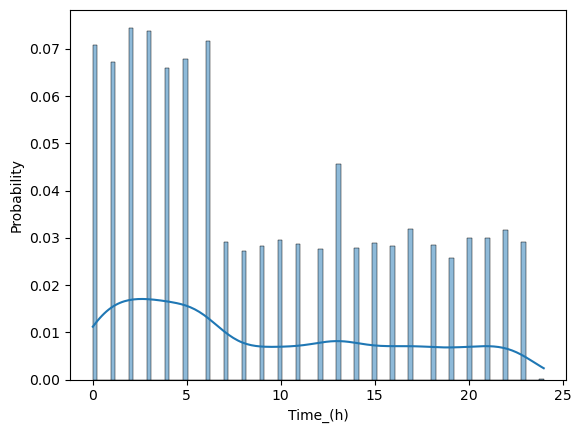

In [23]:
# ok, we dont know what the time feature is, so lets look at it.

df1['Time_(h)'].describe() # the max is 24, hour of day is 24, could be day. 
#lets look at the histogram 
time_histo = sns.histplot(df1['Time_(h)'],bins = 100, stat ='probability', kde= True)
time_histo # the transaction increased at after 7, so it could be 24 hour clock

df1['Time_(h)'].describe()

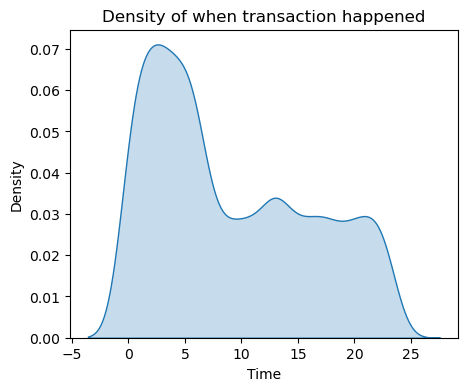

52.07174638487208
Fraudelent 3.7458615481560757 %


C:\Users\nafee\AppData\Local\Temp\ipykernel_10056\2819001967.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tot_bf7 = (len(df2[df['Time_(h)']<=7])/len(df))*100


<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [24]:
# Lets look at the distribution of the numerical features
for x in num_feat1:
    plt.figure(figsize=(5,4))
    if x == 'Time_(h)':
        sns.kdeplot(df1[x],shade = True)
        plt.title('Density of when transaction happened')
        plt.xlabel('Time') 
        plt.ylabel('Density')
        plt.show() 
        
# % of fraud before 6am
df2 = df1
fd_tr_7 = df2[df1['Time_(h)']<=7]
fd = (len(fd_tr_7)/len(df1))*100
print(fd)

# lets see if the transaction itself is higher or not.
tot_bf7 = (len(df2[df['Time_(h)']<=7])/len(df))*100
print('Fraudelent',tot_bf7,'%')
        
###Inference
## WE can see that most of the fraud transactaction happened after midnight.more then 50% happened before and at 7am.
## we can also see that only 3% transaction occured before or at 7. This means that at night, the fraudlent transaction is higher.

Lets create a fraudelent + Normal pipeline. Where we will see:
- When did the highest % of fraud transaction happened.
- Which amount range was most
- Transaction medium, which was highest and which had highest fraud rate.
- Merchant type 
- which country of card
- which country of transaction
- Did they target any gender ?
- Which age group
- Which bank was most susceptible


79.12958843159066 number of transaction below 35 or equal
['Online' 'POS' 'ATM']
[44.48, 32.26, 23.26]
[42.63, 33.07, 24.3]
{'Online': 44.48, 'POS': 32.26, 'ATM': 23.26}
<generator object <genexpr> at 0x00000247413ABF20>


Bank
Barclays    31.88
Metro       11.19
Monzo       10.12
Lloyds       9.64
Barlcays     9.59
Halifax      9.43
HSBC         9.08
RBS          9.07
Name: count, dtype: float64

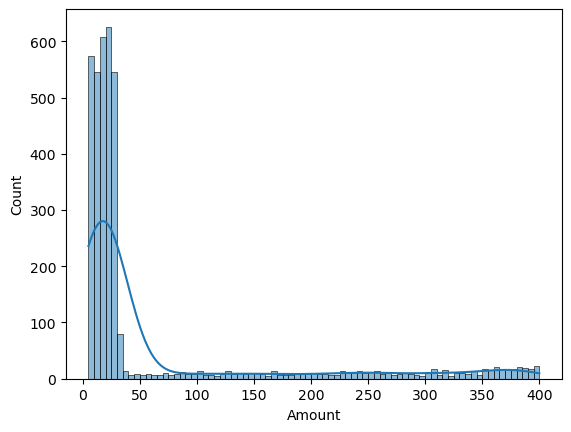

In [25]:
# lets see which amount was the highest in the transaction in the fraud dataset.
# Amount_hist = sns.histplot(df['Amount'], bins = 30, kde = True)
# Amount_hist

# now lets see what was the most no of transaction before or at 7am 
# plt.figure(figsize=(10,20))
Amount_hist1 = sns.histplot(fd_tr_7['Amount'], bins = 100,binwidth=5, kde = True)
# Amount_hist1.set_xticks(np.arange(0,df['Amount'].max()+20, 10))

Amount_hist1 # the highest amount of fraudlent transactions was below 35. 
# lets see how much did the it account for

fd_tr_bl35 = df2[df1['Amount']<=35]
fd1 = (len(fd_tr_bl35)/len(df1['Amount'])*100)
print(fd1,'number of transaction below 35 or equal' )

# We can see that about 80% of the fraud transaction was below 35.


# lets look at the transaction medium 
tm = df1['Type of Transaction'].unique() # this gives distint values, whereas nunique gives no of distinct values.
print(tm)
# percentage of transaction contributed by each of the medium
x = len( df1['Type of Transaction'])
tm1 = [(len( df1[ df1['Type of Transaction'] == 'Online'])/x), 
       (len( df1[ df1['Type of Transaction'] =='POS'])/x), 
       (len( df1[ df1['Type of Transaction']== 'ATM'])/x)]

tm1 = list(map(lambda x: round(x*100, 2), tm1))

print(tm1)
# Online has the highest transaction.
#now lets look at how % of transaction by below 35 by each of the medium.

x = len(fd_tr_bl35['Type of Transaction'])
tm2 = [(len(fd_tr_bl35[fd_tr_bl35['Type of Transaction'] == 'Online'])/x), 
       (len(fd_tr_bl35[fd_tr_bl35['Type of Transaction'] =='POS'])/x), 
       (len(fd_tr_bl35[fd_tr_bl35['Type of Transaction' ]== 'ATM'])/x)]
       
tm2 = list(map(lambda x: round(x*100, 2), tm2))
print(tm2)   

trans = dict(zip(tm, tm1))
print(trans)
print(f"With {key}: {value}" for key, value in trans.items()) 

# merchant type 
df1['Merchant Group'].unique()

# getting the % of each type of Merchant group
# lets get the no of subjects in each class.
mclas_count = df1['Merchant Group'].value_counts() # returns every class size.
mclas_percent = round((mclas_count/len(df1['Merchant Group']))*100, 2)
# mclas_percent = mclas_percent.tolist()
mclas_percent

# which country of orgin it was and the % of it
origin_trans = df1['Country of Transaction'].value_counts()
origin_trans_percent = round((origin_trans/len(df1))*100, 2)

# which bank was most sucsceptible
bank = df1['Bank'].value_counts()
bank_percent = round((bank/len(df1))*100,2)
bank_percent


       


In [26]:
def Fraud_info(df):
    print(f"{fd:.2f}% of fraudelent transaction is before before and at 7am")
    print(f'The amount was pretty low, about 35')
    print(f"{fd1:.2f}% of transaction was below 35,")
    print('-------------------------------------------')
    for key, value in trans.items():
        print(f"With {key}: {value}")
        
    print("Which means ppl with Online transaction contributed most to fraud")
    print(f"The top mechants are {mclas_percent.head(3)}")
    print(f"The origin of transaction is well distributed, with {origin_trans_percent.head(5)}")
    print(f"the bank that was most susceptible was {bank_percent.head(1)}")
    print("People of Uk were most victimised")
        

    
    
    
Fraud_info(df1)

df.info()
# 

52.07% of fraudelent transaction is before before and at 7am
The amount was pretty low, about 35
79.13% of transaction was below 35,
-------------------------------------------
With Online: 44.48
With POS: 32.26
With ATM: 23.26
Which means ppl with Online transaction contributed most to fraud
The top mechants are Merchant Group
Children       17.78
Electronics    13.68
Fashion        12.85
Name: count, dtype: float64
The origin of transaction is well distributed, with Country of Transaction
India             21.93
USA               21.66
China             21.00
Russia            20.58
United Kingdom    14.84
Name: count, dtype: float64
the bank that was most susceptible was Bank
Barclays    31.88
Name: count, dtype: float64
People of Uk were most victimised
<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tra

day of week, type of card, rntry mode: low cardinality, nominal --> 



In [27]:
# getting the feature importance 
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, OrdinalEncoder, RobustScaler
import category_encoders as ce

# encoding the numerical features first




# encoding the numerical features first
print(num_feat1)

rs = RobustScaler()
df['Amount'] = np.log(df['Amount']) ## it is a ML algo, so dual [[]]
# for age, mean == median, normally distrubuted, so no need for scaling.
cat_encode = ['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 
              'Merchant Group', 'Country of Transaction', 'Shipping Address', 
              'Country of Residence', 'Gender', 'Bank']


## encoding the categorical variable
# using label encoder
label = {}

for x in cat_encode:
    le = LabelEncoder() # make a object
    df[x] = le.fit_transform(df[x]) # from the list , take one feature
    label[x] = le




print(cat_feat)


df.info()


# encoding the variable 


['Time_(h)', 'Amount', 'Age']
['Transaction ID', 'Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank', 'Fraud']
<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Transaction ID          99977 non-null  object        
 1   Date                    99977 non-null  datetime64[ns]
 2   Day of Week             99977 non-null  int32         
 3   Time_(h)                99977 non-null  int64         
 4   Type of Card            99977 non-null  int32         
 5   Entry Mode              99977 non-null  int32         
 6   Amount                  99977 non-null  float64       
 7   Type of Transaction     99977 non-null  int32         
 8   Merchant Group          99977 non-null  int32         
 9  

In [ ]:
# now trying to find feature importance 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# feature and traget variable
df = df.drop(columns = 'Date')
df = df.drop(columns = 'Transaction ID')

df = pd.DataFrame(df)
X = df.drop(columns=['Fraud'])
y = df['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

# getting the model 
model = RandomForestClassifier()
model.fit(X_train, y_train)


#fim = feature importance 
fim = model.feature_importances_
print(fim)
# Creating a dataframe for better visualization 
fim = list(map(lambda x: round(x*100), fim ))

fim_df = pd.DataFrame(
    {
    'Feature': X.columns,
    'Importance': fim

    }
)

fim_df = fim_df.sort_values(by ='Importance', ascending=False)
print(fim_df)

# Plot feature importance for executives
plt.figure(figsize=(6, 4))
plt.barh(fim_df['Feature'], fim_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature importance for fraud detection')
plt.xlabel('Relative importance (%)')
plt.tight_layout()
plt.savefig('figures/feature_importance.png', bbox_inches='tight')
plt.show()


[0.00747646 0.36174881 0.01208202 0.01872001 0.09021945 0.01241646
 0.04187099 0.13990602 0.08484014 0.14694352 0.01376961 0.04674473
 0.02326178]


,Feature,Importance
1,Time_(h),36
9,Country of Residence,15
7,Country of Transaction,14
4,Amount,9
8,Shipping Address,8
11,Age,5
6,Merchant Group,4
3,Entry Mode,2
12,Bank,2
0,Day of Week,1


### EDA Conclusion and Proposed Solutions

**Problem 1: Time and Amount of Fraudulent Transactions**
- **Findings**:
  - 52.07% of fraudulent transactions occur before or at 7 AM.
  - The transaction amounts are generally low, about 35.
  - 79.13% of transactions are below 35.
- **Solution**:
  - Implement a flagging system for transactions in the morning (before 7 AM) that are below 35. This can help in early detection and prevention of potential fraud.

**Problem 2: Online Transactions and Merchants Contributing to Fraud**
- **Findings**:
  - A significant portion of fraudulent transactions are online.
  - Top merchants involved:
    - **Children's Products**: 17.78%
    - **Electronics**: 13%
- **Solution**:
  - Enhance monitoring and verification processes for online transactions, particularly those related to these merchant categories.
  - Implement stricter security measures, such as requiring additional verification steps for high-risk merchant categories.

**Additional Insights:**
- **CVC Code Usage**:
  - All online transactions are done by entering the CVC code. No CVC is used outside of online transactions.
- **Origin of Transactions**:
  - The origin of transactions is fairly distributed among four countries, suggesting that all four are suspicious.
  - 98% of the cardholders' origins are from the UK, indicating that hackers are primarily targeting residents of the UK.
- **Feature Importance Analysis (Using Random Forest Classifier)**:
  - **Time of Transaction**: The time of the transaction is a critical factor. Monitoring transactions occurring between midnight and 7 AM can help identify potential fraud.
  - **Transaction Amount**: The transaction amount is also a significant indicator, with amounts below 35 comprising 80% of fraudulent transactions. 

### Refined Solutions:
1. **Enhanced Flagging System**:
   - Develop a dynamic flagging system that not only flags transactions based on time and amount but also considers patterns in merchant categories and geographic origin.
   
2. **Stricter Verification for Online Transactions**:
   - Implement multi-factor authentication (MFA) for online transactions, especially for high-risk categories and during high-risk time frames.
   
3. **Geographic Monitoring**:
   - Increase scrutiny of transactions originating from the identified suspicious countries.
   - Implement additional verification for transactions where the origin does not match the typical behavior of the cardholder.
   
4. **Focus on UK Residents**:
   - Deploy targeted security measures to protect UK residents, such as anomaly detection and enhanced security checks.



## things to look for
- it is an imbalanced dataset, so make sure to validate it with resampling. 


In [29]:
df = df[df['Entry Mode'] =="CVC"]
df   # shit, getting 0 because, it is encoded.

,Day of Week,Time_(h),Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
